<a href="https://colab.research.google.com/github/saraswathykrk/ml_projects/blob/main/NLP_Steps/NLP_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
#Install textblob library 
!pip install textblob #for spelling correction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import string
import re 
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
text = ['This is the NLP TASKS ARTICLE written by ABhishek Jaiswal** ',
        'IN this article I"ll be explaining various DATA-CLEANING techniques',
        'So stay tuned for FURther More &&',
        'Nah I don"t think he goes to usf, he lives around']

In [ ]:
df = pd.DataFrame({'text':text})

In [ ]:
df

,text
0,This is the NLP TASKS ARTICLE written by ABhis...
1,"IN this article I""ll be explaining various DAT..."
2,So stay tuned for FURther More &&
3,"Nah I don""t think he goes to usf, he lives around"


***Step 1: Data Cleaning***

**1. Lowercasing**

In [ ]:
df['lower'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df

,text,lower
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


**2. Punctuation Removal**

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['cleaned'] = df['lower'].apply(lambda x: "".join(i for i in x if i not in string.punctuation))
df

,text,lower,cleaned
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around


In [ ]:
df['using-re'] = df.lower.apply(lambda x: "".join(re.findall(r'[a-zA-Z+" "]',x)))
df

,text,lower,cleaned,using-re
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"in this article i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,so stay tuned for further more
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah i don""t think he goes to usf he lives around"


**3. Stop Words Removal**

In [ ]:
allstopwords = stopwords.words('english')
allstopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['stop']=df['using-re'].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df

,text,lower,cleaned,using-re,stop,corrected,token,stem,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]",nlp task articl written abhishek jaiswal,nlp task article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"in this article i""ll be explaining various dat...","article i""ll explaining various datacleaning t...",article ill explaining various datacleaning te...,"[article, ill, explaining, various, datacleani...",articl ill explain variou dataclean techniqu,article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]",stay tune,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah i don""t think he goes to usf he lives around","nah don""t think goes usf lives around",ah dont think goes us lives around,"[ah, dont, think, goes, us, lives, around]",nah dont think goe usf live around,nah dont think go usf life around


**4. Spelling Correction**

In [ ]:
df['corrected'] = df['stop'].apply(lambda x: str(TextBlob(x).correct()))
df

,text,lower,cleaned,using-re,stop,corrected,token,stem,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]",nlp task articl written abhishek jaiswal,nlp task article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"in this article i""ll be explaining various dat...","article i""ll explaining various datacleaning t...","article i""ll explaining various datacleaning t...","[article, ill, explaining, various, datacleani...",articl ill explain variou dataclean techniqu,article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]",stay tune,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah i don""t think he goes to usf he lives around","nah don""t think goes usf lives around","ah don""t think goes us lives around","[ah, dont, think, goes, us, lives, around]",nah dont think goe usf live around,nah dont think go usf life around


**5. Tokenization**

In [ ]:
mystring = "My favorite animal is cat" 
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [ ]:
df['token'] = df['corrected'].apply(lambda x: nltk.word_tokenize(x))
df

,text,lower,cleaned,using-re,stop,corrected,token,stem,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]",nlp task articl written abhishek jaiswal,nlp task article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"in this article i""ll be explaining various dat...","article i""ll explaining various datacleaning t...","article i""ll explaining various datacleaning t...","[article, i, '', ll, explaining, various, data...",articl ill explain variou dataclean techniqu,article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]",stay tune,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah i don""t think he goes to usf he lives around","nah don""t think goes usf lives around","ah don""t think goes us lives around","[ah, don, '', t, think, goes, us, lives, around]",nah dont think goe usf live around,nah dont think go usf life around


**6. Stemming**

In [ ]:
st = PorterStemmer()
df['stem'] = df['stop'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
df

,text,lower,cleaned,using-re,stop,corrected,token,stem,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]",nlp task articl written abhishek jaiswal,nlp task article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"in this article i""ll be explaining various dat...","article i""ll explaining various datacleaning t...","article i""ll explaining various datacleaning t...","[article, i, '', ll, explaining, various, data...","articl i""ll explain variou dataclean techniqu",article ill explaining various datacleaning te...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,so stay tuned for further more,stay tuned,stay tuned,"[stay, tuned]",stay tune,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah i don""t think he goes to usf he lives around","nah don""t think goes usf lives around","ah don""t think goes us lives around","[ah, don, '', t, think, goes, us, lives, around]","nah don""t think goe usf live around",nah dont think go usf life around


**7. Lemmatization**

In [ ]:
w = Word("played")
w

'played'

In [ ]:
wl = w.lemmatize("v")
wl

'play'

In [ ]:
df['processed'] = df['stop'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))
df

,text,lower,cleaned,using-re,stop,corrected,token,stem,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp tasks article written by abhis...,nlp task article written abhishek jaiswal,nlp tasks article written abhishek jaiswal,nap tasks article written abhishek jaiswal,"[nap, tasks, article, written, abhishek, jaiswal]",nlp task articl written abhishek jaiswal,nlp task article written abhishek jaiswal
1,"IN this article I""ll be explaining various DAT...","in this article i""ll be explaining various dat...",in this article ill be explaining various data...,"article i""ll explaining various datacleaning t...","article i""ll explaining various datacleaning t...","article i""ll explaining various datacleaning t...","[article, i, '', ll, explaining, various, data...","articl i""ll explain variou dataclean techniqu","article i""ll explaining various datacleaning t..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more,stay tuned,stay tuned,stay tuned,"[stay, tuned]",stay tune,stay tuned
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around",nah i dont think he goes to usf he lives around,"nah don""t think go usf life around","nah don""t think goes usf lives around","ah don""t think goes us lives around","[ah, don, '', t, think, goes, us, lives, around]","nah don""t think goe usf live around","nah don""t think go usf life around"


***Step 2 Exploratory Data Analysis***

**1. Word Frequency in Data**

In [ ]:
all_words = []
for sentence in df['processed']:
    all_words.extend(sentence.split())
nltk.FreqDist(all_words)

FreqDist({'abhishek': 1,
          'around': 1,
          'article': 2,
          'datacleaning': 1,
          'don"t': 1,
          'explaining': 1,
          'go': 1,
          'i"ll': 1,
          'jaiswal': 1,
          'life': 1,
          'nah': 1,
          'nlp': 1,
          'stay': 1,
          'task': 1,
          'technique': 1,
          'think': 1,
          'tuned': 1,
          'usf': 1,
          'various': 1,
          'written': 1})

**2. Word Cloud**

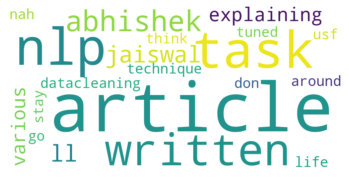

In [ ]:
words = []
for message in df['processed']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white', collocations = False).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()